## Data Analysis Project : Bike Sharing Dataset
- __Name__: Fariz Erawan
- __Email__: farizerawan476@gmail.com
- __ID Dicoding__: faris1108

### About the Bike Sharing Dataset

#### Data Set Information

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

#### Attribute information

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Define a Business Question

- Which season has the highest and lowest average number of bike-sharing?
- What are the average daily usage patterns of bike share services?
- How has the number of bicycle users performed in recent years?
- How does the number of bike-share differ in terms of casual and registered users on working days and holidays?
- Which days of the week have the highest number of rentals?
- How does the weather affect rental patterns at various times of the day (like :early morning, dawn, morning, daytime, afternoon, evening)?

### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Wrangling

#### Gathering Data

Load the dataset through local access.

In [2]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Insight:
There are 17 columns of `hour_df` table

#### Assesing Data

Check for duplicated values, check for missing values, check for inaccurate values, etc.

##### Data type check

In [3]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Missing Value

In [4]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Duplicate value

In [5]:
print('Jumlah duplikasi: ', hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Data statistic

In [6]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##### Insight:
- Handle `dteday` variable from object to date data type
- Convert `weathersit` variable represented as a category


#### Cleaning Data

##### Handle `dteday` to datetime type

In [8]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

##### Change `weathersit` to categorical feature

In [9]:
hour_df['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\279732397.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}, inplace=True)


In [10]:
hour_df['weathersit'].value_counts()

weathersit
Clear         11413
Mist           4544
Light Rain     1419
Heavy Rain        3
Name: count, dtype: int64

##### Insight 
- The data is complete: There are no missing values in all columns.
- The data type `dteday` has been converted to datetime type.
- Converted `weathersit` data type to categorical.

### Exploratory Data Analysis (EDA)

Explore `hour_df`

In [11]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Groupby variable `season`

In [12]:
hour_df.groupby('season').agg({
    'registered': 'mean',
    'casual' : 'mean',
    'cnt': ['max', 'min', 'mean']
})

registered     casual  cnt                
              mean       mean  max min        mean
season                                            
1        96.823668  14.290901  801   1  111.114569
2       162.183488  46.160581  957   1  208.344069
3       185.729093  50.287144  977   1  236.016237
4       168.202032  30.666824  967   1  198.868856

#### Groupby variable `hr`

In [13]:
hour_df['hr'].value_counts(ascending=False).head()

hr
17    730
16    730
13    729
15    729
14    729
Name: count, dtype: int64

In [14]:
hour_time = hour_df.groupby('hr')[['registered','casual']].mean()

In [15]:
hour_time.head()

,registered,casual
hr,,
0,43.739669,10.158402
1,26.871547,6.504144
2,18.097902,4.772028
3,9.011478,2.715925
4,5.098996,1.253945


#### Bike-share perform

In [16]:
hour_df.groupby('mnth').agg({
    'registered' : ['sum', 'mean'],
    'casual' : ['sum', 'mean'],
    'cnt' : 'sum'
})

registered             casual                cnt
            sum        mean    sum       mean     sum
mnth                                                 
1        122891   85.997901  12042   8.426872  134933
2        136389  101.706935  14963  11.158091  151352
3        184476  125.238289  44444  30.172437  228920
4        208292  144.949200  60802  42.311761  269094
5        256401  172.312500  75285  50.594758  331686
6        272436  189.191667  73906  51.323611  346342
7        266791  179.295027  78157  52.524866  344948
8        279155  189.257627  72039  48.840000  351194
9        275668  191.835769  70323  48.937370  345991
10       262592  180.973122  59760  41.185389  322352
11       218228  151.863605  36603  25.471816  254831
12       189343  127.675657  21693  14.627782  211036

#### The difference between `casual` and `registered` on workingdays and holidays

In [17]:
hour_df.groupby(by='workingday').agg({
    'registered': ['mean'],
    'casual': ['mean']
})

,registered,casual
,mean,mean
workingday,,
0,123.963910,57.441422
1,167.646439,25.561315


In [18]:
hour_df.groupby(by='holiday').agg({
    'registered': ['mean'],
    'casual': ['mean']
})

,registered,casual
,mean,mean
holiday,,
0,155.020203,35.408377
1,112.152000,44.718000


#### Groupby variable `weekday`

In [19]:
weekdays_time = hour_df.groupby('weekday').agg({
    'cnt':'sum'
})

In [20]:
hour_df.groupby(by='weekday').agg({
    'casual': 'mean',
    'registered': 'mean'
})

,casual,registered
weekday,,
0,56.163469,121.305356
1,28.553449,155.191206
2,23.580514,167.658377
3,23.159192,167.971313
4,24.872521,171.564144
5,31.458786,164.677121
6,61.246815,128.962978


#### Manual Group

In [21]:
time_category_in_hr=  hour_df['hr']
hour_df['time'] = hour_df['hr'].apply(lambda x: 'Early Morning' if 0 <= x <= 3 else ('Dawn' if 3 < x <= 6 else 'Morning' if 7 <= x <= 10 else 'Daytime' if 11 <= x <= 14 else 'Afternoon' if 15 <= x <= 18 else 'Evening'))
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time
725,726,2011-02-02,1,0,2,14,0,3,1,Clear,0.38,0.3939,0.82,0.3881,2,61,63,Daytime
5043,5044,2011-08-03,3,0,8,1,0,3,1,Mist,0.78,0.7121,0.52,0.1642,7,9,16,Early Morning
877,878,2011-02-09,1,0,2,0,0,3,1,Clear,0.10,0.0758,0.36,0.3582,0,17,17,Early Morning
13999,14000,2012-08-11,3,1,8,12,0,6,0,Clear,0.76,0.7121,0.58,0.2239,214,332,546,Daytime
5705,5706,2011-08-31,3,0,8,4,0,3,1,Clear,0.56,0.5303,0.73,0.0000,0,5,5,Dawn


#### Variable `temp`

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\1872373892.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


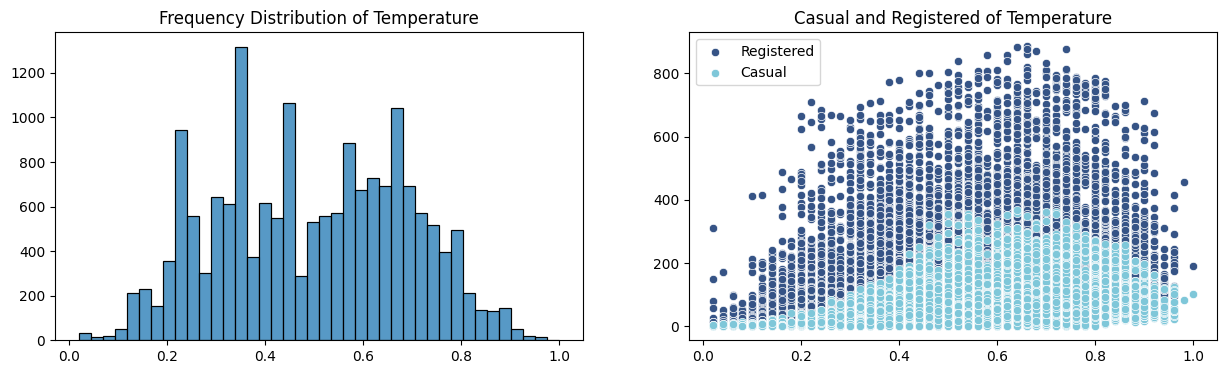

In [22]:
# Create two graphs with a figure size of 15.4
fig, ax = plt.subplots(1,2,figsize=(15,4))

# Create a histogram plot using seaborn for freq
sns.histplot(x='temp', data=hour_df, ax=ax[0])

# Create label and title
ax[0].set_title('Frequency Distribution of Temperature')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

# Correlation Figure
sns.scatterplot(x='temp',y='registered',data=hour_df, label='Registered', color='#365486', ax=ax[1])
sns.scatterplot(x='temp',y='casual',data=hour_df, label='Casual', color='#7FC7D9', ax=ax[1])

# Create label and title
ax[1].set_title('Casual and Registered of Temperature')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.legend()
fig.show()

#### Variable `atemp`

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\2025704022.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


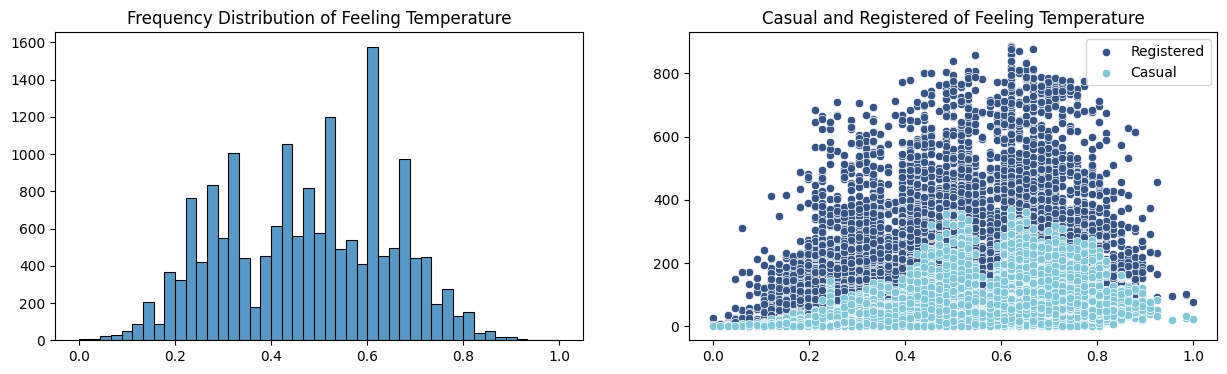

In [23]:
# Create two graphs with a figure size of 15.4
fig, ax = plt.subplots(1,2,figsize=(15,4))

# Create a histogram plot using seaborn for freq
sns.histplot(x='atemp', data=hour_df, ax=ax[0])

# Create label and title
ax[0].set_title('Frequency Distribution of Feeling Temperature')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

# Create a scatter plot using seaborn for count
sns.scatterplot(x='atemp',y='registered',data=hour_df, label='Registered', color='#365486', ax=ax[1])
sns.scatterplot(x='atemp',y='casual',data=hour_df, label='Casual', color='#7FC7D9', ax=ax[1])

# Create label and title
ax[1].set_title('Casual and Registered of Feeling Temperature')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.legend()
fig.show()

#### Variable `hum`

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\2216337023.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


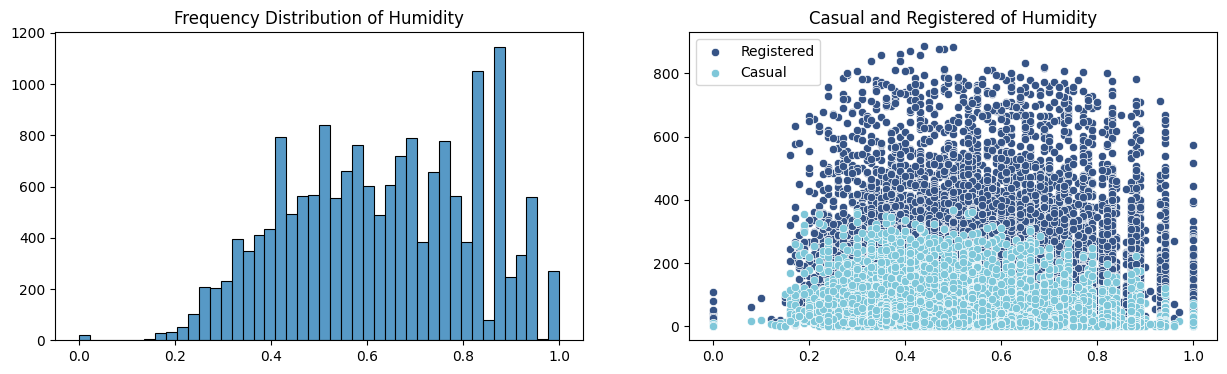

In [24]:
# Create two graphs with a figure size of 15.4
fig, ax = plt.subplots(1,2,figsize=(15,4))

# Create a histogram plot using seaborn for freq
sns.histplot(x='hum', data=hour_df, ax=ax[0])

# Create label and title 
ax[0].set_title('Frequency Distribution of Humidity')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

# Create a scatter plot using seaborn for count
sns.scatterplot(x='hum',y='registered',data=hour_df, label='Registered', color='#365486', ax=ax[1])
sns.scatterplot(x='hum',y='casual',data=hour_df, label='Casual', color='#7FC7D9', ax=ax[1])

# Create label and title 
ax[1].set_title('Casual and Registered of Humidity')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.legend()
fig.show()

#### Variable `windspeed`

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\3564170771.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


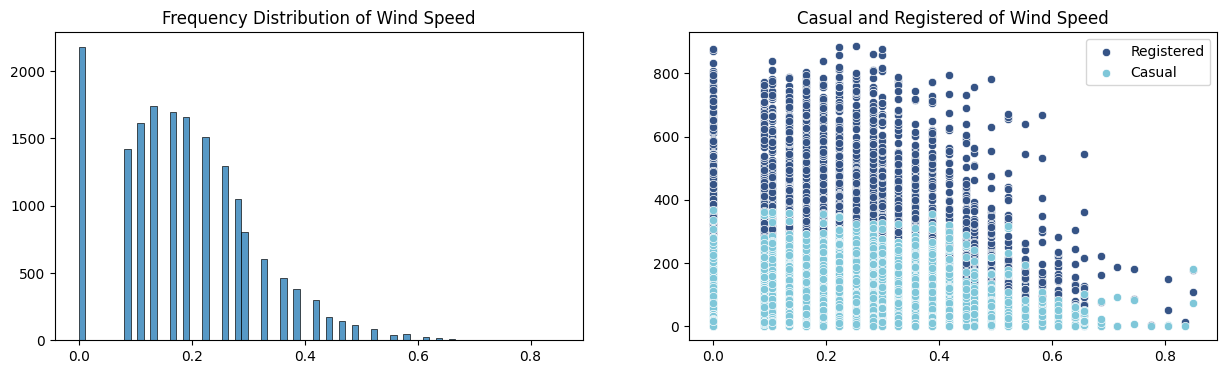

In [25]:
# Create two graphs with a figure size of 15.4
fig, ax = plt.subplots(1,2,figsize=(15,4))

# Create a histogram plot using seaborn for freq
sns.histplot(x='windspeed', data=hour_df, ax=ax[0])

# Create label and title 
ax[0].set_title('Frequency Distribution of Wind Speed')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

# Create a scatter plot using seaborn for count
sns.scatterplot(x='windspeed',y='registered',data=hour_df, label='Registered', color='#365486', ax=ax[1])
sns.scatterplot(x='windspeed',y='casual',data=hour_df, label='Casual', color='#7FC7D9', ax=ax[1])

# Create label and title 
ax[1].set_title('Casual and Registered of Wind Speed')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.legend()
fig.show()

##### Insight
- The count of bikeshare are the highest in value 3 (fall).
- The number of users seems higher in value 17 (5pm).
- In the middle of the year, there are more casual and registered bike share users than at the beginning of the year.
- On average, registered users outnumber casual users on both working days and holidays.
- More casual bicycle users on weekend than working day.
- Added a new column to mark the time category of each data manually with clustering technique.
- From these observations, there is no significant correlation between temperature, feeling temperature, humidity, wind speed with bikeshare.

### Visualization and Explanatory Data Analysis

- Which season has the highest and lowest average number of bike-sharing?
- What are the average daily usage patterns of bike share services?
- How has the number of bicycle users performed in recent years?
- How does the number of bike-share differ in terms of casual and registered users on working days and holidays?
- Which days of the week have the highest number of rentals?
- How does the weather affect rental patterns at various times of the day (like :early morning, dawn, morning, daytime, afternoon, evening)?

#### 1. Which season has the highest and lowest average number of bike-sharing?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\1806999805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=hour_df, ax=ax[0], palette=['#91C8E4','#91C8E4','#4682A9','#91C8E4'], width=0.5)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\1806999805.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


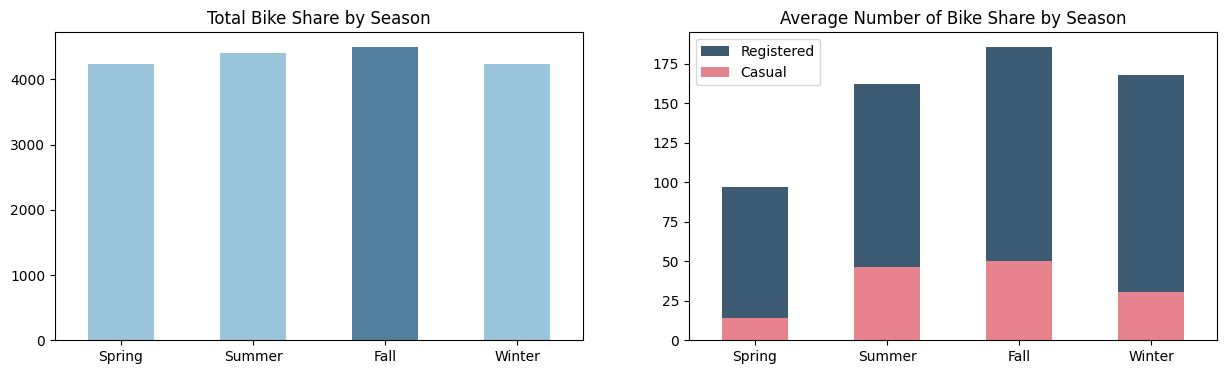

In [26]:
# Create two graphs with a figure size of 15.4
fig, ax = plt.subplots(1,2,figsize=(15,4))

# Create a count plot using seaborn for count
sns.countplot(x='season', data=hour_df, ax=ax[0], palette=['#91C8E4','#91C8E4','#4682A9','#91C8E4'], width=0.5)

# Create label and title 
ax[0].set_title('Total Bike Share by Season')
ax[0].set_xticks([0 ,1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])  
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

# Create a bar plot using seaborn for avg
sns.barplot(x='season',y='registered',data=hour_df, label='Registered', color='#355C7D', ax=ax[1], width=0.5, errorbar=None)
sns.barplot(x='season',y='casual',data=hour_df, label='Casual', color='#F67280', ax=ax[1], width=0.5, errorbar=None)

# Create label and title 
ax[1].set_title('Average Number of Bike Share by Season')
ax[1].set_xticks([0 ,1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])  
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.legend()
fig.show()

__Insight__
- Fall season the highest average rate of bikeshare, while spring season recorded the lowest numbers.

#### 2. What are the average daily usage patterns of bike share services?

In [27]:
hour_time.head()

,registered,casual
hr,,
0,43.739669,10.158402
1,26.871547,6.504144
2,18.097902,4.772028
3,9.011478,2.715925
4,5.098996,1.253945


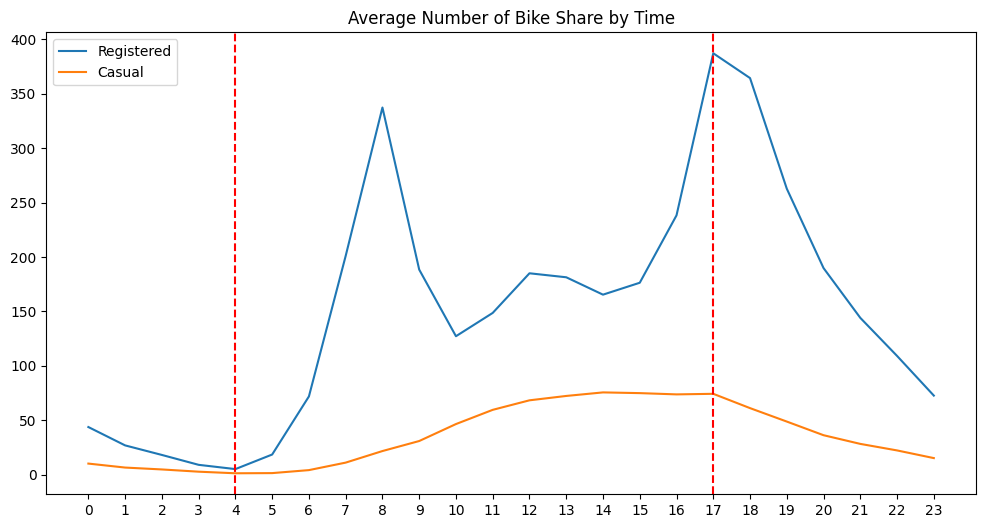

In [28]:
# Create graphs with a figure size of 12.6
plt.figure(figsize=(12,6))

# Create a line plot using seaborn
sns.lineplot(x='hr', y='registered', data=hour_time.reset_index(), label='Registered')
sns.lineplot(x='hr', y='casual', data=hour_time.reset_index(), label='Casual')
x = np.arange(0, 24, 1)
plt.xticks(x)

# Create label and title 
plt.xlabel(None)
plt.ylabel(None)
plt.title('Average Number of Bike Share by Time')

# Create highlight
plt.axvline(x=4, color='red', linestyle='--')
plt.axvline(x=17, color='red', linestyle='--')

plt.legend(loc='upper left')
plt.show()


__Insight__
- On average, bike share are highest at 5pm. Meanwhile, 4am is the least common time for rentals.

#### 3. How has the number of bicycle users performed in recent years?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\1216347985.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


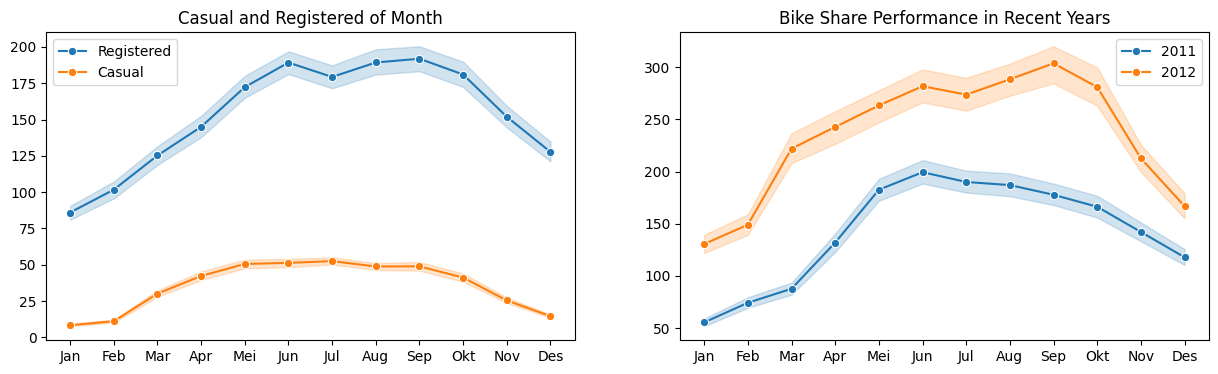

In [29]:
# Create two graphs with a figure size of 15.4
fig, ax = plt.subplots(1,2,figsize=(15,4))

# Create a line plot using seaborn
sns.lineplot(x='mnth',y='registered',data=hour_df, label='Registered', marker='o', ax=ax[0])
sns.lineplot(x='mnth',y='casual',data=hour_df, label='Casual', marker='o', ax=ax[0])

# Create label and title 
ax[0].set_title('Casual and Registered of Month')
ax[0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des'])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

# Create a line plot using seaborn
sns.lineplot(x='mnth',y='cnt',data=hour_df, hue='yr', marker='o', ax=ax[1])

# Create label and title 
ax[1].set_title('Bike Share Performance in Recent Years')
ax[1].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des'])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

year_dict = {0: 2011, 1: 2012}
handles, labels = ax[1].get_legend_handles_labels()
plt.legend(handles, [year_dict[int(label)] for label in labels])

fig.show()

__Insight__
- The number of registered bikeshare trips was higher than casual trips.
- The number of bikeshare rentals in 2012 was higher than in 2011.

#### 4. How does the number of bike-share differ in terms of casual and registered users on working days and holidays?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\1164618848.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


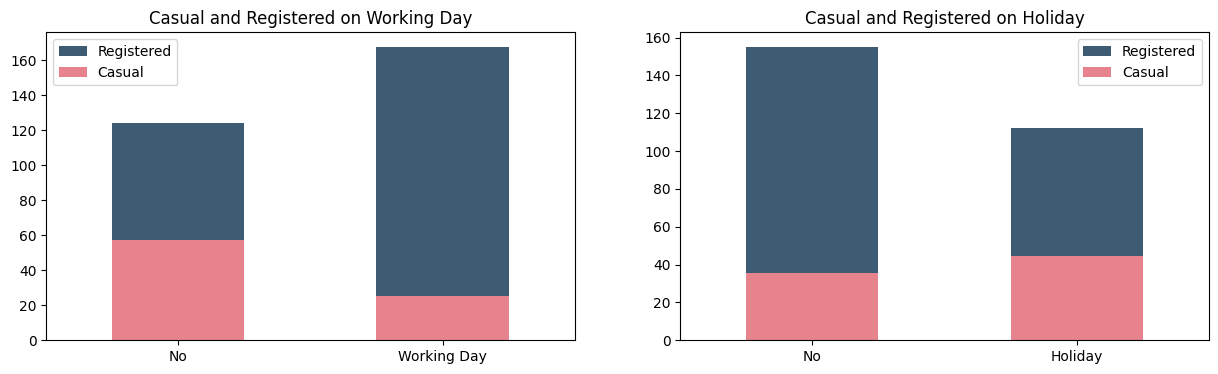

In [30]:
# Create two graphs with a figure size of 15.4
fig, ax = plt.subplots(1,2,figsize=(15,4))

# Create a bar plot using seaborn for workingday
sns.barplot(x='workingday',y='registered',data=hour_df, label='Registered', color='#355C7D', ax=ax[0], width=0.5, errorbar=None)
sns.barplot(x='workingday',y='casual',data=hour_df, label='Casual', color='#F67280', ax=ax[0], width=0.5, errorbar=None)
ax[0].set_title('Casual and Registered on Working Day')
ax[0].set_xticks([0, 1], ['No', 'Working Day']) 
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

# Create a bar plot using seaborn for holiday
sns.barplot(x='holiday',y='registered',data=hour_df, label='Registered', color='#355C7D', ax=ax[1], width=0.5, errorbar=None)
sns.barplot(x='holiday',y='casual',data=hour_df, label='Casual', color='#F67280', ax=ax[1], width=0.5, errorbar=None)
ax[1].set_title('Casual and Registered on Holiday')
ax[1].set_xticks([0, 1], ['No', 'Holiday']) 
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.legend()
fig.show()

__Insight__
- Bike-share tend to be lower during holidays.
- Conversely, Bike-share spike on working days.

#### 5. Which days of the week have the highest number of rentals?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\250741852.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=weekdays_time, ax=ax[0], palette=['#91C8E4','#91C8E4','#91C8E4','#91C8E4','#91C8E4','#4682A9','#91C8E4'], width=0.5)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\250741852.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


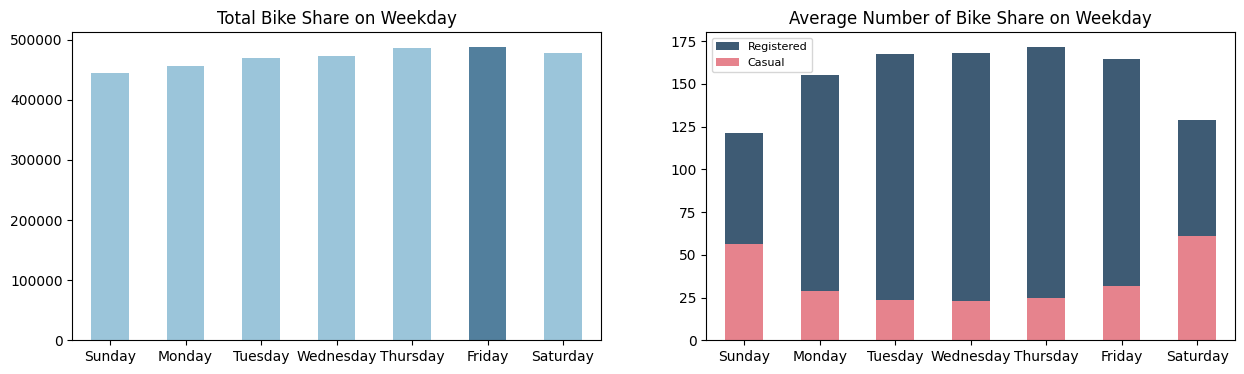

In [31]:
# Create two graphs with a figure size of 15.4
fig, ax = plt.subplots(1,2,figsize=(15,4))

# Create a bar plot using seaborn for count
sns.barplot(x='weekday', y='cnt', data=weekdays_time, ax=ax[0], palette=['#91C8E4','#91C8E4','#91C8E4','#91C8E4','#91C8E4','#4682A9','#91C8E4'], width=0.5)

# Create label and title 
ax[0].set_title('Total Bike Share on Weekday')
ax[0].set_xticks([0 ,1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])  
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

# Create a bar plot using seaborn for avg
sns.barplot(x='weekday',y='registered',data=hour_df, label='Registered', color='#355C7D', ax=ax[1], width=0.5, errorbar=None)
sns.barplot(x='weekday',y='casual',data=hour_df, label='Casual', color='#F67280', ax=ax[1], width=0.5, errorbar=None)
    
# Create label and title 
ax[1].set_title('Average Number of Bike Share on Weekday')
ax[1].set_xticks([0 ,1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])  
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.legend(loc='upper left', fontsize=8)
fig.show()

__Insight__
- Friday is the weekday with the highest number of bikeshare.

### Advanced Analysis Techniques (Clustering)

#### 6. How does the weather affect rental patterns at various times of the day (like :early morning, dawn, morning, daytime, afternoon, evening)?

In [32]:
hour_df.groupby(by='time').instant.nunique().sort_values(ascending=False)

time
Evening          3640
Afternoon        2917
Daytime          2913
Morning          2908
Early Morning    2862
Dawn             2139
Name: instant, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\1652780775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='time', data=hour_df, ax=ax[0], palette=['#91C8E4','#91C8E4','#91C8E4','#91C8E4','#91C8E4','#4682A9'], width=0.5)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\1652780775.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weathersit', data=hour_df, ax=ax[1], palette=['#4682A9','#91C8E4','#91C8E4','#91C8E4'], width=0.5)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2264\1652780775.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legen

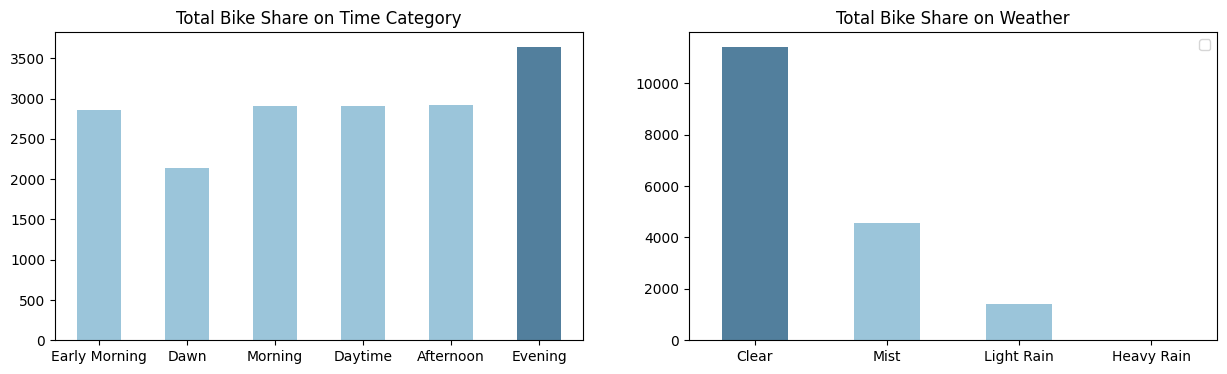

In [33]:
# Create two graphs with a figure size of 15.4
fig, ax = plt.subplots(1,2,figsize=(15,4))

# Create a count plot using seaborn for count
sns.countplot(x='time', data=hour_df, ax=ax[0], palette=['#91C8E4','#91C8E4','#91C8E4','#91C8E4','#91C8E4','#4682A9'], width=0.5)

# Create label and title 
ax[0].set_title('Total Bike Share on Time Category')  
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

# Create a count plot using seaborn for count
sns.countplot(x='weathersit', data=hour_df, ax=ax[1], palette=['#4682A9','#91C8E4','#91C8E4','#91C8E4'], width=0.5)

# Create label and title 
ax[1].set_title('Total Bike Share on Weather')  
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.legend()
plt.show()

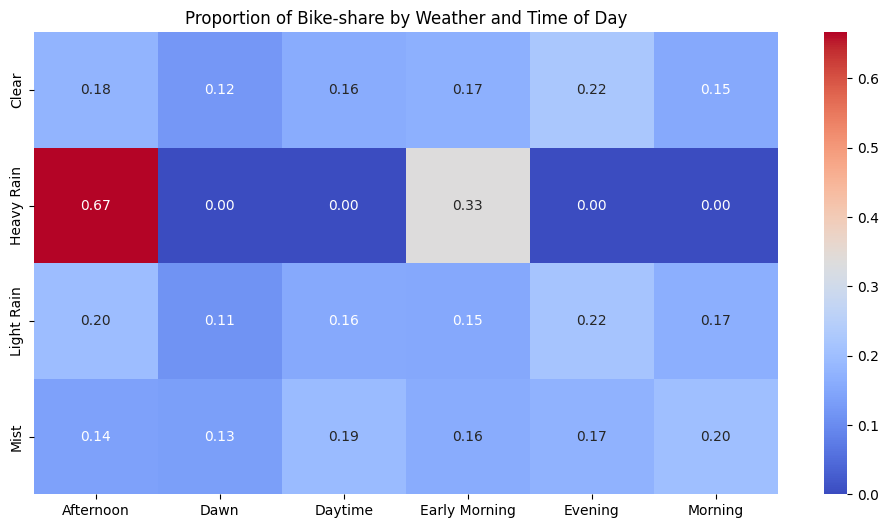

In [34]:
contingency_table = pd.crosstab(hour_df['weathersit'], hour_df['time'])

# Create graph with a figure size 12.6
plt.figure(figsize=[12,6])

# Calculate Proportion
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Create a heatmap plot using seaborn
sns.heatmap(proportions, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Proportion of Bike-share by Weather and Time of Day')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

__Insight__
- Evening time has the highest number of users bike share.
- Clear weather conditions are generally the main factor that encourages users to bike share.

### Conclusion

1. Which season has the highest and lowest average number of bike-sharing? 
> The season with the highest number of rentals (both total and average) is Summer, while Winter has the lowest number of rentals. There are significant fluctuations in the total number of bike share between seasons. However, overall, the total number of rentals tends to be stable throughout the year.

2. What are the average daily usage patterns of bike share services?
> For both registered and casual users, the average peak of bike share usage occurs at 5pm. Meanwhile, 4am is the least popular time to bike share.

3. How has the number of bicycle users performed in recent years?
> In general, the number of bike share has increased from 2011 to 2012. This also had a corresponding impact with both casual and registered users increasing in the following year. This indicates a positive trend in bicycle use.

4. How does the number of bike-share differ in terms of casual and registered users on working days and holidays?
> Bike share occurs more on working days than holidays. Then, there are different usage patterns of registered and casual users on working days and holidays. With working days being dominated by registered users. On holidays, there are more casual users.

5. Which days of the week have the highest number of rentals?
> The highest total bike share usage occurred on Friday. Overall, bike share was fairly stable throughout the week. Nonetheless, weekdays (Monday to Friday) tend to have a slightly higher amount of usage, especially for registered users. In contrast, casual users tend to use their bicycles more on weekends.

6. How does the weather affect rental patterns at various times of the day (like :early morning, dawn, morning, daytime, afternoon, evening)?
> Weather conditions have a very significant influence on bike share patterns. Clear weather greatly encourages bike usage, while bad weather, especially heavy rain, significantly reduces the number of bike share.